In [73]:
import pandas as pd
import numpy as np

In [2]:
engagement = pd.read_csv('takehome_user_engagement.csv',encoding = "ISO-8859-1")
users = pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")

In [3]:
engagement.time_stamp = pd.to_datetime(engagement.time_stamp)

In [65]:
users.creation_time = pd.to_datetime(users.creation_time)

In [4]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [9]:
usersweekly = engagement.groupby(['user_id',pd.Grouper(key='time_stamp',freq='1W')]).agg('sum')

In [11]:
usersweekly.reset_index(inplace=True)

In [13]:
adopted = usersweekly.loc[usersweekly['visited']>=3]

In [15]:
adoptedusers = adopted.drop_duplicates(subset='user_id',keep='first')

In [19]:
adoptedusers.head()

,user_id,time_stamp,visited
7,2,2014-02-09,3
23,10,2013-03-03,3
96,20,2014-03-16,3
110,33,2014-03-23,3
126,42,2012-12-30,4


In [17]:
users['adopted'] = 0
users.loc[users.object_id.isin(adoptedusers.user_id), 'adopted'] = 1

In [27]:
users['invited'] = 0
users.loc[users.invited_by_user_id.notna(), 'invited'] = 1

In [28]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0,1
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0,1


In [64]:
users.corr()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited
object_id,1.000000,0.015238,-0.032370,-0.022040,0.004110,0.018699,0.007481,-0.009149
last_session_creation_time,0.015238,1.000000,0.006590,0.008035,0.042203,0.011874,0.403210,0.004916
opted_in_to_mailing_list,-0.032370,0.006590,1.000000,0.483529,0.003432,0.004699,0.010339,0.006934
enabled_for_marketing_drip,-0.022040,0.008035,0.483529,1.000000,0.009275,0.003687,0.005901,0.002216
org_id,0.004110,0.042203,0.003432,0.009275,1.000000,-0.057780,0.060683,-0.018442
invited_by_user_id,0.018699,0.011874,0.004699,0.003687,-0.057780,1.000000,0.000356,NaN
adopted,0.007481,0.403210,0.010339,0.005901,0.060683,0.000356,1.000000,0.022735
invited,-0.009149,0.004916,0.006934,0.002216,-0.018442,NaN,0.022735,1.000000


In [23]:
len(users.org_id.unique())

417

In [26]:
len(users.invited_by_user_id.unique())

2565

In [138]:
df = pd.get_dummies(users,columns=['creation_source'])

In [139]:
df['date_delta'] = (df['creation_time'] - df['creation_time'].min())  / np.timedelta64(1,'D')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 17 columns):
object_id                             12000 non-null int64
creation_time                         12000 non-null datetime64[ns]
name                                  12000 non-null object
email                                 12000 non-null object
last_session_creation_time            8823 non-null float64
opted_in_to_mailing_list              12000 non-null int64
enabled_for_marketing_drip            12000 non-null int64
org_id                                12000 non-null int64
invited_by_user_id                    6417 non-null float64
adopted                               12000 non-null int64
invited                               12000 non-null int64
creation_source_GUEST_INVITE          12000 non-null uint8
creation_source_ORG_INVITE            12000 non-null uint8
creation_source_PERSONAL_PROJECTS     12000 non-null uint8
creation_source_SIGNUP                12000 non-null

In [141]:
df

,object_id,creation_time,name,email,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,date_delta
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,1.398139e+09,1,0,11,10803.0,0,1,1,0,0,0,0,691.131979
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1.396238e+09,0,0,1,316.0,1,1,0,1,0,0,0,533.126123
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1.363735e+09,0,0,94,1525.0,0,1,0,1,0,0,0,292.938484
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,1.369210e+09,0,0,1,5151.0,0,1,1,0,0,0,0,355.309734
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,1.358850e+09,0,0,193,5240.0,0,1,1,0,0,0,0,231.396447
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,1.387424e+09,0,0,197,11241.0,0,1,1,0,0,0,0,565.120590
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,1.356010e+09,0,1,37,NaN,0,0,0,0,0,1,0,199.528530
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,NaN,1,1,74,NaN,0,0,0,0,1,0,0,426.201794
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,NaN,0,0,302,NaN,0,0,0,0,1,0,0,523.139549
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,1.401833e+09,1,1,318,4143.0,1,1,0,1,0,0,0,230.892083


In [142]:
y = df['adopted']
X = df.drop(['object_id','creation_time','name','email','last_session_creation_time','org_id','invited_by_user_id','adopted',],axis=1)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, log_loss
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=7)

In [151]:
logreg = LogisticRegression(penalty='l2')
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [152]:
y_pred = logreg.predict(X_test)

In [153]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2108    0]
 [ 292    0]]
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      2108
          1       0.00      0.00      0.00       292

avg / total       0.77      0.88      0.82      2400



C:\Users\liamc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


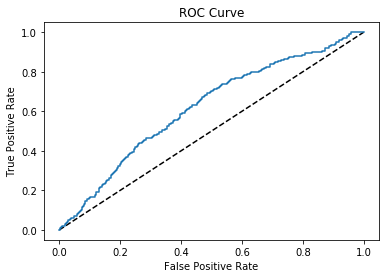

AUC: 0.6178956226768215


In [154]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

In [155]:
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.62186209 0.61123395 0.6454115  0.62133429 0.5832048 ]


In [156]:
#model coefficients
Coefficients = pd.DataFrame()
Coefficients['features'] = X.columns
Coefficients['model_coefficients'] = np.transpose(logreg.coef_)
Coefficients

,features,model_coefficients
0,opted_in_to_mailing_list,0.073765
1,enabled_for_marketing_drip,0.003613
2,invited,-0.095389
3,creation_source_GUEST_INVITE,0.073872
4,creation_source_ORG_INVITE,-0.169262
5,creation_source_PERSONAL_PROJECTS,-0.954274
6,creation_source_SIGNUP,-0.164102
7,creation_source_SIGNUP_GOOGLE_AUTH,-0.006392
8,date_delta,-0.001366


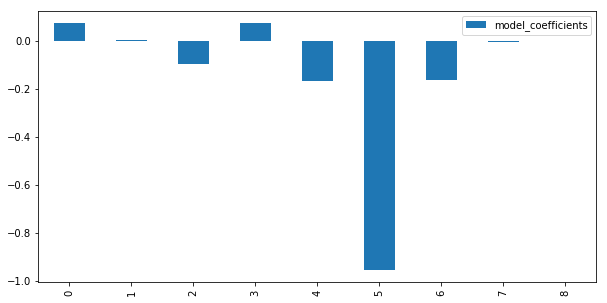

In [157]:
Coefficients.plot(kind='bar',figsize=(10,5))

## Conclusion

#### From my brief analysis here I can say that the user creation source of 'personal projects' is a strong negative predictor of user adoption.  The creation sources of 'org invite' and 'signup' are weaker negative predictors.  Opting in to the mailing list and creating the account via 'guest invite' are weak positive predictors of user adoption.